In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import os, sys, getpass
user = getpass.getuser()
sys.path.append(f'/home/{user}/codes/hpe_library/')
from hpe_library.lib_import import *
from hpe_library. my_utils import *
os.chdir('/home/hrai/codes/MotionBERT')

### train S1, S5, S6, S7, S8  test S9, S11

In [2]:
joint_2ds = {'train': [], 'test': []}
confidences = {'train': [], 'test': []}
joint3d_images = {'train': [], 'test': []}
joints_25d_images = {'train': [], 'test': []}
_25d_factors = {'train': [], 'test': []}
camera_names = {'train': [], 'test': []}
actions = {'train': [], 'test': []}
sources = {'train': [], 'test': []}
frames = {'train': [], 'test': []}
world_3ds = {'train': [], 'test': []}
cam_3ds = {'train': [], 'test': []}
cam_params = {'train': [], 'test': []}
canonical_3ds = {'train': [], 'test': []}

# target 
pkl_folder = '/home/hrai/codes/MotionBERT/data/motion3d/h36m_gt_pkl_canonical_3d_same_dist'
test_subject = ['S9', 'S11']
only_test = False

blacklist = []

for item in tqdm(os.listdir(pkl_folder)):
    subject, cam_num, action = item.split('.')[0].split('_') 
    
    # filtering
    #if action not in action_list: continue 
    #if int(cam_num) not in camera_list: continue
    if only_test:
        if subject not in test_subject: continue
    if subject in blacklist: continue
    #print(subject, cam_num, action, phase) 
    
    item_path = os.path.join(pkl_folder, item) 
    data = readpkl(item_path) 
    if subject in test_subject: data_type = 'test' 
    else: data_type = 'train' 

    joint_2ds[data_type] += list(np.array(data['joint_2d_from_canonical_3d'])) 
    confidences[data_type] += list(np.array(data['confidence'])) 
    joint3d_images[data_type] += list(np.array(data['joint3d_image_from_canonical_3d'])) 
    joints_25d_images[data_type] += list(np.array(data['joints_2.5d_image_from_canonical_3d'])) 
    _25d_factors[data_type] += data['2.5d_factor_from_canonical_3d'] 
    camera_names[data_type] += data['camera_name']  
    actions[data_type] += data['action'] 
    sources[data_type] += data['source'] 
    frames[data_type] += data['frame'] 
    world_3ds[data_type] += list(np.array(data['world_3d'])) 
    cam_3ds[data_type] += list(np.array(data['cam_3d'])/1000.0) # mm to m
    cam_params[data_type] += data['cam_param'] 
    canonical_3ds[data_type] += list(np.array(data['canonical_3d']))
    #break
    
data_total = {'train': {}, 'test': {}}

for data_type in ['train', 'test']:
    data_total[data_type]['joint_2d_from_canonical_3d']          = copy.deepcopy(np.array(joint_2ds[data_type]))
    data_total[data_type]['confidence']                          = copy.deepcopy(np.array(confidences[data_type]))
    data_total[data_type]['joint3d_image_from_canonical_3d']     = copy.deepcopy(np.array(joint3d_images[data_type]))
    data_total[data_type]['joints_2.5d_image_from_canonical_3d'] = copy.deepcopy(np.array(joints_25d_images[data_type]))
    data_total[data_type]['2.5d_factor_from_canonical_3d']       = copy.deepcopy(np.array(_25d_factors[data_type]))
    data_total[data_type]['camera_name']                         = copy.deepcopy(np.array(camera_names[data_type]))
    data_total[data_type]['action']                              = copy.deepcopy(np.array(actions[data_type]))
    data_total[data_type]['source']                              = copy.deepcopy(np.array(sources[data_type]))
    data_total[data_type]['frame']                               = copy.deepcopy(np.array(frames[data_type]))
    data_total[data_type]['world_3d']                            = copy.deepcopy(np.array(world_3ds[data_type]))
    data_total[data_type]['cam_3d']                              = copy.deepcopy(np.array(cam_3ds[data_type]))
    data_total[data_type]['cam_param']                           = copy.deepcopy(np.array(cam_params[data_type]))
    data_total[data_type]['canonical_3d']                        = copy.deepcopy(np.array(canonical_3ds[data_type]))
    
if len(data_total['train']['joint_2d']) == 0:
    data_total['train'] = copy.deepcopy(data_total['test'])

data_total['train']['joint_2d_from_canonical_3d'].shape, data_total['test']['joint_2d_from_canonical_3d'].shape  

100%|██████████| 836/836 [02:30<00:00,  5.55it/s]


In [3]:
save_path = os.path.join('/home/hrai/codes/MotionBERT', f'data/motion3d/h36m_gt_canonical_3d_same_dist.pkl')
savepkl(data_total, save_path)

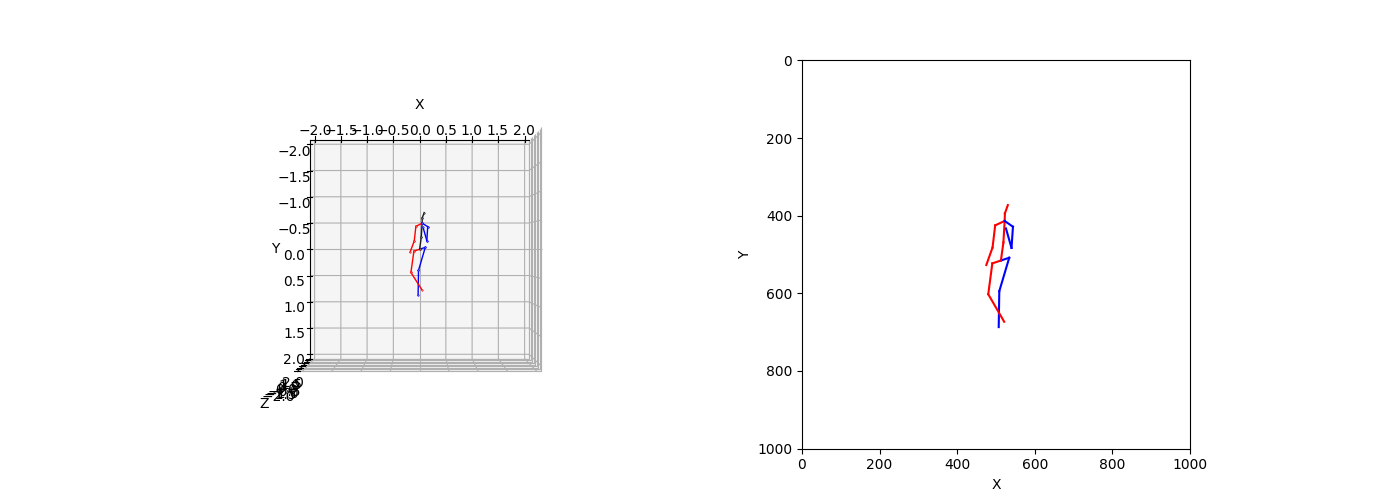

In [13]:
frame_num = 1800
cam_3d = data_total['train']['cam_3d'][frame_num]
cam_3d_hat = get_rootrel_pose((cam_3d))
joint_2d = data_total['train']['joint_2d_from_canonical_3d'][frame_num]
joint3d_image = data_total['train']['joint3d_image_from_canonical_3d'][frame_num]
joints_25d_image = data_total['train']['joints_2.5d_image_from_canonical_3d'][frame_num]
_25d_factor = data_total['train']['2.5d_factor_from_canonical_3d'][frame_num]

%matplotlib widget
fig = plt.figure(0)
fig.clear()
ax = axes_3d(fig, loc=121, view=(-90,-90))
ax2 = axes_2d(fig, loc=122)
draw_3d_pose(ax, cam_3d_hat)
#draw_3d_pose(ax, joint3d_image)
#draw_3d_pose(ax, get_rootrel_pose(joints_25d_image/1000), color='r')
draw_2d_pose(ax2, joint_2d)
plt.show()

### change key name: add '_from_canonical_3d'

In [2]:
save_path = os.path.join('/home/hrai/codes/MotionBERT', f'data/motion3d/h36m_gt_canonical_3d_same_dist.pkl')
data_total = readpkl(save_path)
data_total.keys(), data_total['train'].keys()

In [8]:
data_type = 'train'
if 'joint_2d' in data_total[data_type].keys():
    data_total[data_type]['joint_2d_from_canonical_3d'] = data_total[data_type]['joint_2d'].copy()
    del data_total[data_type]['joint_2d']
if 'joint3d_image' in data_total[data_type].keys():
    data_total[data_type]['joint3d_image_from_canonical_3d'] = data_total[data_type]['joint3d_image'].copy()
    del data_total[data_type]['joint3d_image']
if 'joints_2.5d_image' in data_total[data_type].keys():
    data_total[data_type]['joints_2.5d_image_from_canonical_3d'] = data_total[data_type]['joints_2.5d_image'].copy()
    del data_total[data_type]['joints_2.5d_image']
if '2.5d_factor' in data_total[data_type].keys():
    data_total[data_type]['2.5d_factor_from_canonical_3d'] = data_total[data_type]['2.5d_factor'].copy()
    del data_total[data_type]['2.5d_factor']
data_total[data_type].keys()
data_type = 'test'
if 'joint_2d' in data_total[data_type].keys():
    data_total[data_type]['joint_2d_from_canonical_3d'] = data_total[data_type]['joint_2d'].copy()
    del data_total[data_type]['joint_2d']
if 'joint3d_image' in data_total[data_type].keys():
    data_total[data_type]['joint3d_image_from_canonical_3d'] = data_total[data_type]['joint3d_image'].copy()
    del data_total[data_type]['joint3d_image']
if 'joints_2.5d_image' in data_total[data_type].keys():
    data_total[data_type]['joints_2.5d_image_from_canonical_3d'] = data_total[data_type]['joints_2.5d_image'].copy()
    del data_total[data_type]['joints_2.5d_image']
if '2.5d_factor' in data_total[data_type].keys():
    data_total[data_type]['2.5d_factor_from_canonical_3d'] = data_total[data_type]['2.5d_factor'].copy()
    del data_total[data_type]['2.5d_factor']
data_total[data_type].keys()

dict_keys(['confidence', 'camera_name', 'action', 'source', 'frame', 'world_3d', 'cam_3d', 'cam_param', 'joint_2d_from_canonical_3d', 'joint3d_image_from_canonical_3d', 'joints_2.5d_image_from_canonical_3d', '2.5d_factor_from_canonical_3d'])

In [9]:
savepkl(data_total, save_path)